In [ ]:
# run the script in the Google Colab platform
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# read the CSV data generated by the SQL script
kmeans_df = pd.read_csv('/content/drive/My Drive/MS-data/Drive/DA205/traveltide-indexes.csv')
kmeans_df.head()

,user_id,free_hotel_meal_index,avg_checked_bags_index,cancellation_index,bargain_hunter_index,flight_hotel_booked_index
0,23557,0.002747,NaN,0.0,NaN,0.0
1,94883,NaN,0.066176,0.0,NaN,1.0
2,101486,NaN,0.000000,0.0,NaN,0.5
3,101961,NaN,0.132353,0.0,0.000096,1.0
4,106907,NaN,0.661765,0.5,NaN,1.0


In [ ]:
# check for missing / Null values
kmeans_df.isna().sum()

user_id                         0
free_hotel_meal_index        4338
avg_checked_bags_index        818
cancellation_index            456
bargain_hunter_index         4280
flight_hotel_booked_index     456
dtype: int64

In [ ]:
# fill NaN with 0
kmeans_df.loc[kmeans_df['free_hotel_meal_index'].isnull(), "free_hotel_meal_index"] = 0
kmeans_df.loc[kmeans_df['avg_checked_bags_index'].isnull(), 'avg_checked_bags_index'] = 0
kmeans_df.loc[kmeans_df['cancellation_index'].isnull(), 'cancellation_index'] = 0
kmeans_df.loc[kmeans_df['bargain_hunter_index'].isnull(), 'bargain_hunter_index'] = 0
kmeans_df.loc[kmeans_df['flight_hotel_booked_index'].isnull(),'flight_hotel_booked_index'] = 0
kmeans_df.isna().sum()

user_id                      0
free_hotel_meal_index        0
avg_checked_bags_index       0
cancellation_index           0
bargain_hunter_index         0
flight_hotel_booked_index    0
dtype: int64

In [ ]:
# gather features for clustering
features = ['free_hotel_meal_index','avg_checked_bags_index','cancellation_index','bargain_hunter_index','flight_hotel_booked_index']
IX = kmeans_df[features]
IX

,free_hotel_meal_index,avg_checked_bags_index,cancellation_index,bargain_hunter_index,flight_hotel_booked_index
0,0.002747,0.000000,0.00,0.000000,0.00
1,0.000000,0.066176,0.00,0.000000,1.00
2,0.000000,0.000000,0.00,0.000000,0.50
3,0.000000,0.132353,0.00,0.000096,1.00
4,0.000000,0.661765,0.50,0.000000,1.00
...,...,...,...,...,...
5993,0.000000,0.132353,0.00,0.000000,0.25
5994,0.000000,0.330882,0.25,0.004378,0.75
5995,0.000000,0.066176,0.00,0.003808,1.00
5996,0.000000,0.000000,0.00,0.000000,1.00


In [ ]:
# normalize the data
ss = StandardScaler()
ss_x = ss.fit_transform(IX)
ss_x

array([[ 0.52293823, -0.97620583, -0.30556084, -0.20916081, -1.86236304],
       [-0.14817812, -0.26738932, -0.30556084, -0.20916081,  0.92099319],
       [-0.14817812, -0.97620583, -0.30556084, -0.20916081, -0.47068492],
       ...,
       [-0.14817812, -0.26738932, -0.30556084,  0.06474909,  0.92099319],
       [-0.14817812, -0.97620583, -0.30556084, -0.20916081,  0.92099319],
       [-0.14817812, -0.97620583, -0.30556084, -0.20916081, -1.86236304]])

In [ ]:
# Apply K-means clustering to partition data points into 5 clusters
num_of_clusters = 5
kmeans = KMeans(n_clusters=num_of_clusters, random_state=0)

# K-means assigns cluster number
kmeans_df['cluster_num'] = kmeans.fit_predict(ss_x)

kmeans_df.sample(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,free_hotel_meal_index,avg_checked_bags_index,cancellation_index,bargain_hunter_index,flight_hotel_booked_index,cluster_num
903,510134,0.000533,0.264706,0.0,0.001159,0.833333,0
5979,760304,0.000000,0.132353,0.0,0.006242,1.000000,0
3840,557449,0.000000,0.066176,0.0,0.000000,1.000000,0
134,400899,0.000000,0.132353,0.0,0.000000,1.000000,0
3976,560497,0.000000,0.000000,0.0,0.000000,1.000000,0


In [ ]:
# Map perk labels to cluster numbers
def map_labels(cluster_num):
    if cluster_num == 0:
       perk_label = 'Free Hotel Meal'
    elif cluster_num == 1:
       perk_label = 'Free Checked Bag'
    elif cluster_num == 2:
      perk_label = 'No Cancellation Fees'
    elif cluster_num == 3:
      perk_label = 'Exclusive Discounts'
    else:
      perk_label = '1 Night Free Hotel with Flight'
    return perk_label

kmeans_df['perk'] = kmeans_df['cluster_num'].apply(map_labels)

In [ ]:
# check for perks distribution numbers
kmeans_df['perk'].value_counts()

Free Hotel Meal                   3600
Free Checked Bag                  1765
Exclusive Discounts                579
1 Night Free Hotel with Flight      37
No Cancellation Fees                17
Name: perk, dtype: int64

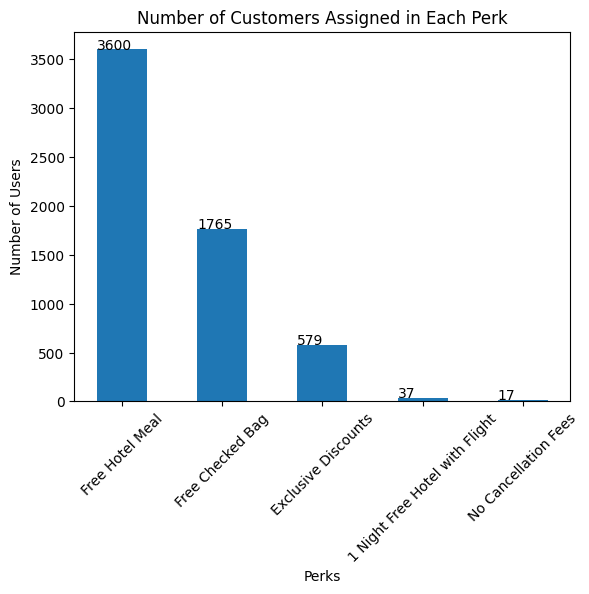

In [ ]:
# Visaualize perks distribution
perk_counts=kmeans_df['perk'].value_counts()

plt.title('Number of Customers Assigned in Each Perk')
plt.xlabel('Perks')
plt.ylabel('Number of Users')

x = perk_counts.index
y = perk_counts.values
bars = plt.bar(x, height=y, width=.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .003, yval)

plt.xticks(rotation=45)
plt.show()

In [ ]:
# backup perks by kmeans method to csv file
kmeans_df[['user_id','perk']].to_csv('/content/drive/My Drive/MS-data/Drive/DA205/traveltide-kmeans-perks.csv', encoding='utf-8', index=False)